In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from numpy import asarray
import glob
import cv2
# import tensorflow as tf
# from tensorflow import keras

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Data

#### Labels for images   ____ train.csv

In [6]:
Labels_DF=pd.read_csv("Labels_DF.csv")

In [7]:
Labels_DF.head(5)

,Unnamed: 0,file_name,species,individual_id,category,species_category
0,0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,1,16
1,1,000562241d384d.jpg,humpback_whale,1a71fbb72250,1,13
2,2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,1,8
3,3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,0,2
4,4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,1,13


In [ ]:
len(Labels_DF['species'].value_counts())
len(Labels_DF)

51033

In [ ]:
#Labels_DF['species'].value_counts()

#### Images

In [12]:
#retrieve image names
image_names=pd.read_csv("Image_Names_DF.csv")

In [14]:
image_names.head(8)

,Unnamed: 0,0
0,0,00021adfb725ed.jpg
1,1,000562241d384d.jpg
2,2,0007c33415ce37.jpg
3,3,0007d9bca26a99.jpg
4,4,00087baf5cef7a.jpg
5,5,000a8f2d5c316a.jpg
6,6,000be9acf46619.jpg
7,7,000bef247c7a42.jpg


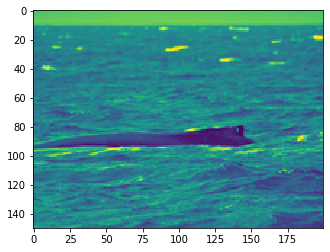

In [ ]:
plt.imshow(image_list[7])

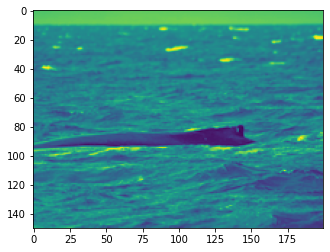

In [18]:
plt.imshow(FullXArray[7])

In [17]:
# Retrieve X Array

FullXArray=np.load("drive/MyDrive/Full_X_array.npy")

In [19]:
len(FullXArray), len(image_names)

(51033, 51033)

In [25]:
image_names["0"][7]

'000bef247c7a42.jpg'

In [28]:
imnames=[]
for each in image_names["0"]:
  imnames.append(each)

In [34]:
imnames[7]

'000bef247c7a42.jpg'

In [45]:
Images=[]
for image in FullXArray:
  Images.append(image)

In [46]:
len(Images)

51033

In [48]:
Image_DF=pd.DataFrame({
    'image': Images,
    'file_name': imnames
    })

In [49]:
Image_DF.head(8)

,image,file_name
0,"[[0.592156862745098, 0.5764705882352941, 0.560...",00021adfb725ed.jpg
1,"[[0.7568627450980392, 0.7647058823529411, 0.74...",000562241d384d.jpg
2,"[[0.7490196078431373, 0.7568627450980392, 0.74...",0007c33415ce37.jpg
3,"[[0.7686274509803922, 0.7647058823529411, 0.75...",0007d9bca26a99.jpg
4,"[[0.3215686274509804, 0.30980392156862746, 0.3...",00087baf5cef7a.jpg
5,"[[0.6274509803921569, 0.6784313725490196, 0.66...",000a8f2d5c316a.jpg
6,"[[0.4, 0.40784313725490196, 0.403921568627451,...",000be9acf46619.jpg
7,"[[0.7411764705882353, 0.7411764705882353, 0.74...",000bef247c7a42.jpg


In [50]:
## Join Dataframes

Big_DF=Image_DF.merge(Labels_DF, how='inner')

In [52]:
len(Big_DF)

41362

In [51]:
#Big_DF=Big_DF[:152]
Big_DF.tail(5)

,image,file_name,Unnamed: 0,species,individual_id,category,species_category
41357,"[[0.5294117647058824, 0.5215686274509804, 0.50...",dff96a89c85815.jpg,44601,pantropic_spotted_dolphin,193496745768,0,18
41358,"[[0.3333333333333333, 0.32941176470588235, 0.3...",dffbd2340fb99a.jpg,44602,killer_whale,ea1158a38699,1,14
41359,"[[0.9019607843137255, 0.9019607843137255, 0.90...",dffcfafe735907.jpg,44603,bottlenose_dolphin,cc0e0b020a90,0,2
41360,"[[0.5568627450980392, 0.5490196078431373, 0.55...",dffe20bc14fe42.jpg,44604,fin_whale,180c0ab04dcd,1,9
41361,"[[0.21568627450980393, 0.23137254901960785, 0....",dfff6ac007bd30.jpg,44605,dusky_dolphin,c0cf89810e76,0,7


In [53]:
Big_DF['species'].isna().sum()

0

In [55]:
Big_DF.drop("Unnamed: 0", axis=1, inplace=True)

In [56]:
Big_DF.head(8)

,image,file_name,species,individual_id,category,species_category
0,"[[0.592156862745098, 0.5764705882352941, 0.560...",00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,1,16
1,"[[0.7568627450980392, 0.7647058823529411, 0.74...",000562241d384d.jpg,humpback_whale,1a71fbb72250,1,13
2,"[[0.7490196078431373, 0.7568627450980392, 0.74...",0007c33415ce37.jpg,false_killer_whale,60008f293a2b,1,8
3,"[[0.7686274509803922, 0.7647058823529411, 0.75...",0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,0,2
4,"[[0.3215686274509804, 0.30980392156862746, 0.3...",00087baf5cef7a.jpg,humpback_whale,8e5253662392,1,13
5,"[[0.6274509803921569, 0.6784313725490196, 0.66...",000a8f2d5c316a.jpg,bottlenose_dolphin,b9907151f66e,0,2
6,"[[0.4, 0.40784313725490196, 0.403921568627451,...",000be9acf46619.jpg,beluga,afb9b3978217,1,0
7,"[[0.7411764705882353, 0.7411764705882353, 0.74...",000bef247c7a42.jpg,humpback_whale,444d8894ccc8,1,13


In [57]:
## Save Dataframe
Big_DF.to_csv("drive/MyDrive/Big_DF.csv")

In [58]:
mismatched_images=len(Big_DF)-51033
mismatched_images

-9671

## 9,671 images do not match up with their labeled image name

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=80)
Labels_DF['species'].hist(edgecolor='black', bins=28)

### Create train/val Dataset

In [ ]:
from sklearn.model_selection import train_test_split

y=Big_DF['category']
X=Big_DF['image']

### One Hot Encode Labels

In [ ]:
# One hot encode labels

from keras.utils import to_categorical

y_hot=to_categorical(y)

y_hot[:6]

### Turn list of X into array of arrays

In [ ]:
X_array=np.array(image_list)

### Reshape array

In [ ]:
X_array=X_array.reshape(-1, 150, 200, 1)
X_array.shape

### save prepared data

In [ ]:
np.save('Sample_X_array', X_array)

In [ ]:
np.save('Sample_Y_array', y_hot)

### Training and Validation sets

In [ ]:
X_train, X_val, y_train, y_val= train_test_split(X_array,y_hot, train_size=.80, stratify=y)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
from tensorflow.keras import layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(150,200,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(30000, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_array, y_train,batch_size=30, epochs=5)

### Images for EfficientNet

In [ ]:
## Create image extraction and augment function
from PIL import ImageOps
import cv2


def retrieve_augment(path, size=(224,224,3)):
    image_list = []
    for filename in glob.glob(path):
        im=Image.open(filename)
        reshaped=ImageOps.fit(im, size, Image.ANTIALIAS)
        reshaped_gray=reshaped.convert(mode='L')
        array=asarray(reshaped_gray)
        norm=array/255
        image_list.append(norm)
        im.close()
    return image_list

In [ ]:
image_list=retrieve_augment(path='../../Kaggle_Marine_Life/train_images/*.jpg')

In [ ]:
image_list

[]

## Separate Dolphins into species of Dolphin

In [ ]:
Dolphins_Species=pd.DataFrame(Labels_DF.loc[Labels_DF['sub_cat']==1])

In [ ]:
Dolphins_Species['species_category'].value_counts()

#### Consider combining categories with low counts for better training when trying to identify individuals

In [ ]:
len(Labels_DF['individual_id'].unique())

####  15,587 unique individuals in entire data set (dolphins and whales) 51,000 images.  Cannot make individual id files.
####  Species category 10 has 13 unique individuals out of 14 instances.